In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 100)  
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#uploading the dataset
df= pd.read_csv('HR data.csv')

In [4]:
#printing the data
df

,Age,Attrition,BusinessTravel,DailyRate,Department,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,...,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,...,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,...,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,...,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,...,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,...,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,...,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,...,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,...,2,9,6,0,8


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  ...  WorkLifeBalance  \
0      41       Yes      Travel_Rarely       1102                   Sales  ...                1   
1      49        No  Travel_Frequently        279  Research & Development  ...                3   
2      37       Yes      Travel_Rarely       1373  Research & Development  ...                3   
3      33        No  Travel_Frequently       1392  Research & Development  ...                3   
4      27        No      Travel_Rarely        591  Research & Development  ...                3   
...   ...       ...                ...        ...                     ...  ...              ...   
1465   36        No  Travel_Frequently        884  Research & Development  ...                3   
1466   39        No      Travel_Rarely        613  Research & Development  ...                3   
1467   27        No      Travel_Rarely        155  Research & Development  

In [7]:
#removing unnecessary columns.
columns_to_remove = ["EmployeeCount", "WorkLifeBalance", "StandardHours","EnvironmentSatisfaction","Over18","PercentSalaryHike","StockOptionLevel"]
df = df.drop(columns_to_remove, axis=1)

In [8]:
df.shape

(1470, 28)

In [9]:
#Giving the columns new names
new_column_names = {
    "Age": "Employee Age",
    "Attrition": "Employee Turnover",  
    "BusinessTravel": "Business Trip Frequency",
    "DailyRate": "Daily Pay Rate",
    "Department": "Employee Department",
    "DistanceFromHome": "Distance from Workplace", 
    "Education": "Education Level",
    "EducationField": "Field of Study",
    "EmployeeNumber": "Employee ID",  
    "Salary": "Employee Salary",
    "Gender": "Employee Gender",
    "JobRole" : "Job Role"
}
df = df.rename(columns=new_column_names)
df.columns

Index(['Employee Age', 'Employee Turnover', 'Business Trip Frequency', 'Daily Pay Rate',
       'Employee Department', 'Distance from Workplace', 'Education Level', 'Field of Study',
       'Employee ID', 'Employee Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'Job Role',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#finding duplicates
duplicate = df[df.duplicated()]

# Print the duplicate rows
if len(duplicate) > 0:
    print("There are duplicate rows in the data")
    print(duplicates.head())
else:
    print("No duplicate rows found")

No duplicate rows found


In [11]:
#Sanitize specific columns
df["Employee Turnover"] = df["Employee Turnover"].map({"Yes": 1, "No": 0})


In [12]:
#checking for null values
missing_values = df.isnull().sum()
print(missing_values)

Employee Age                0
Employee Turnover           0
Business Trip Frequency     0
Daily Pay Rate              0
Employee Department         0
Distance from Workplace     0
Education Level             0
Field of Study              0
Employee ID                 0
Employee Gender             0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
Job Role                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


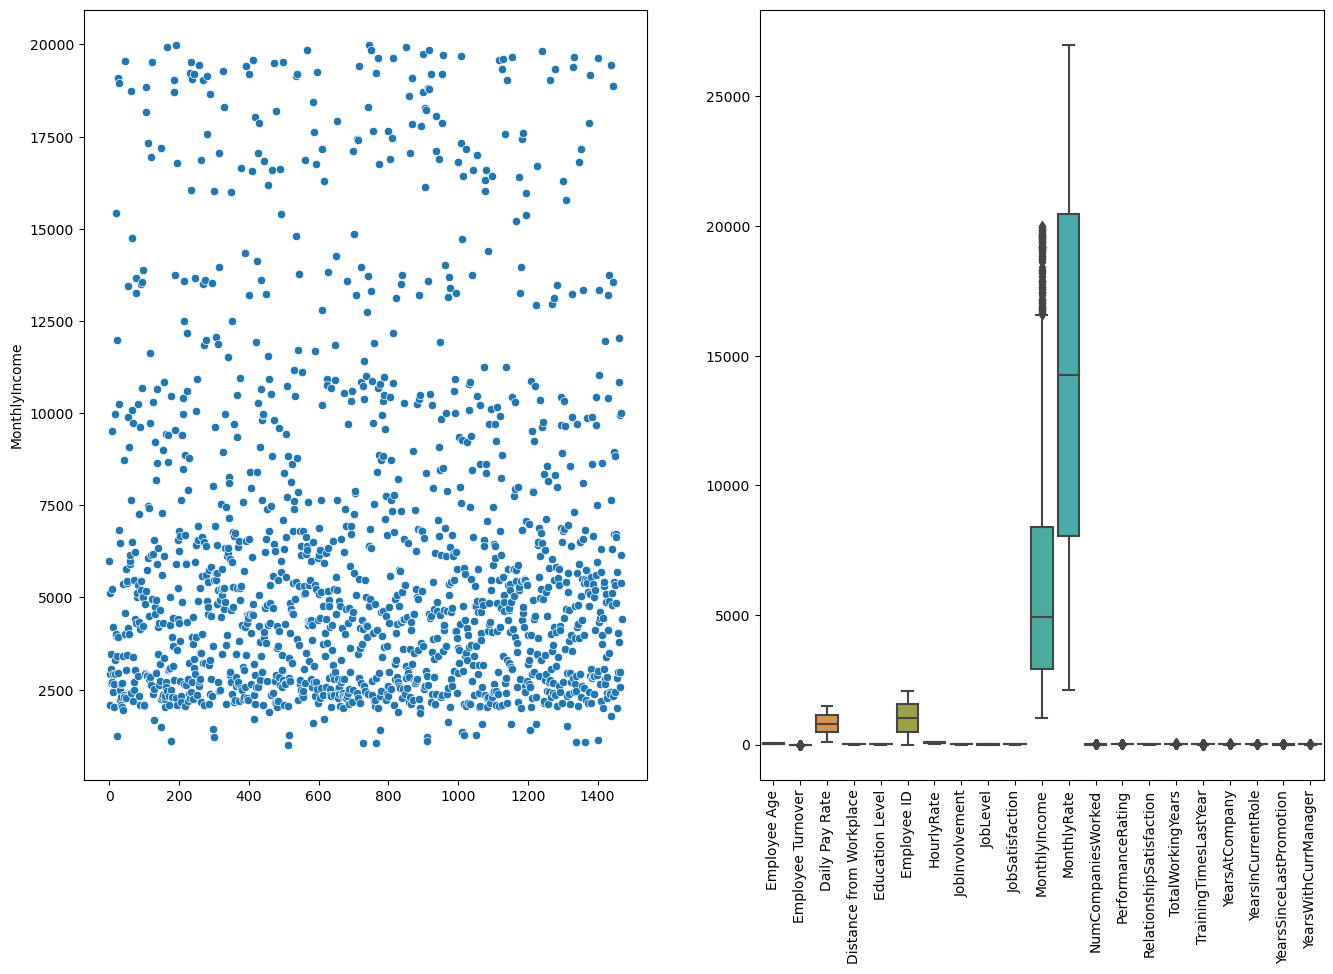

In [54]:
#Outlier Detection with Boxplot and Scatterplot
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.scatterplot(df['MonthlyIncome'])
plt.subplot(1,2,2)
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [14]:
# Calculate correlations
corr = df.select_dtypes(include=[np.number]).corr()

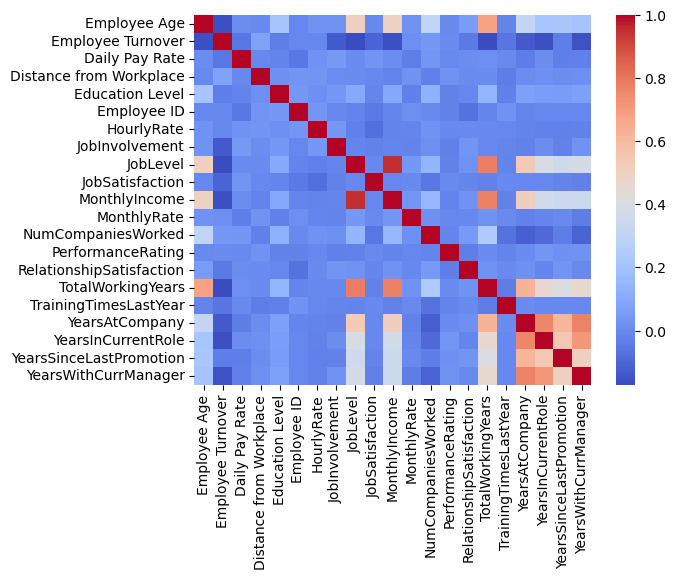

In [17]:
#plot heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()


In [18]:
#Outlier deletion with IQR
Q1= df['MonthlyIncome'].quantile(0.25)
Q3= df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
clean_data=df[(df['MonthlyIncome']>=lower) & (df['MonthlyIncome']<=upper)]

clean_data.reset_index()

,index,Employee Age,Employee Turnover,Business Trip Frequency,Daily Pay Rate,...,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,...,0,6,4,0,5
1,1,49,0,Travel_Frequently,279,...,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,...,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,...,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,...,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1351,1465,36,0,Travel_Frequently,884,...,3,5,2,0,3
1352,1466,39,0,Travel_Rarely,613,...,5,7,7,1,7
1353,1467,27,0,Travel_Rarely,155,...,0,6,2,0,3
1354,1468,49,0,Travel_Frequently,1023,...,3,9,6,0,8


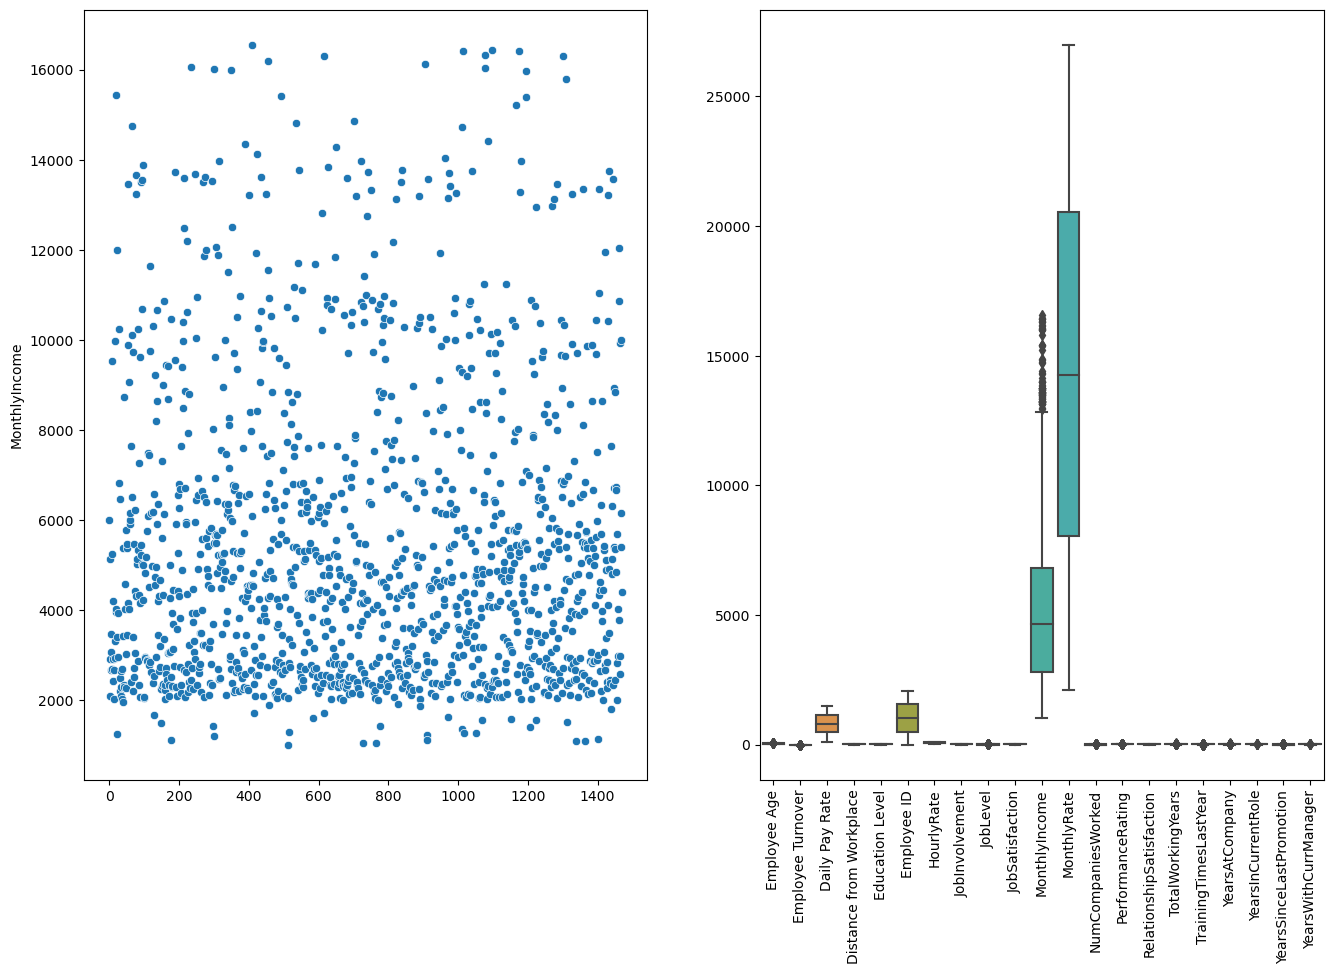

Number of Rows Deleted: 114


In [19]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.scatterplot(clean_data['MonthlyIncome'])
plt.subplot(1,2,2)
sns.boxplot(clean_data)
plt.xticks(rotation=90)
plt.show()

print(f'Number of Rows Deleted: {df.shape[0] - clean_data.shape[0]}')

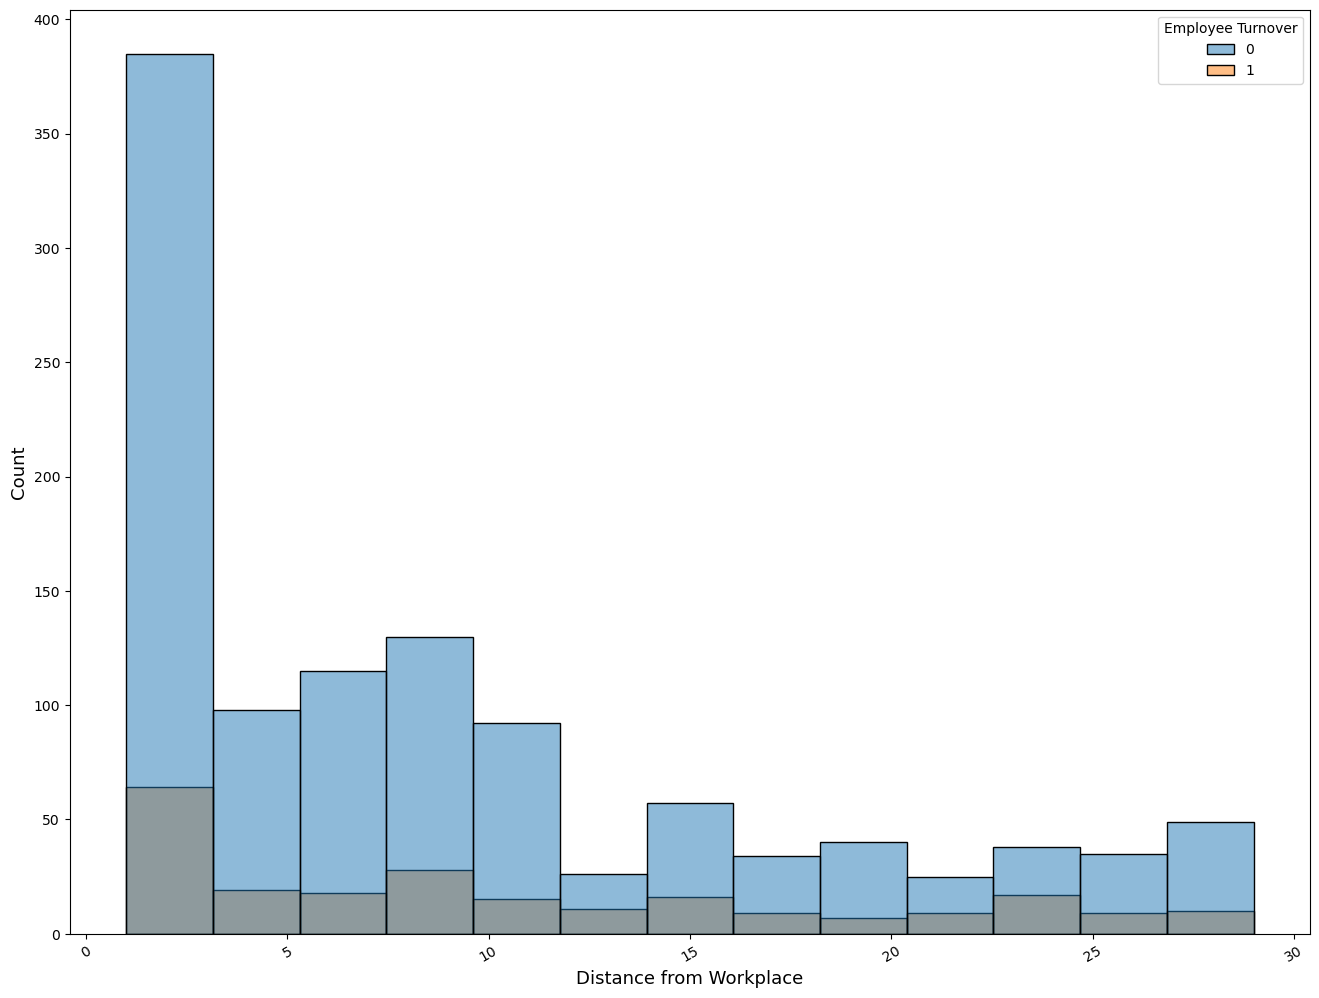

In [20]:
#Employee turnover vs distance from home
plt.figure(figsize=(16,12))
sns.histplot(clean_data,x='Distance from Workplace',hue='Employee Turnover')
plt.xticks(rotation=30)
plt.xlabel('Distance from Workplace', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

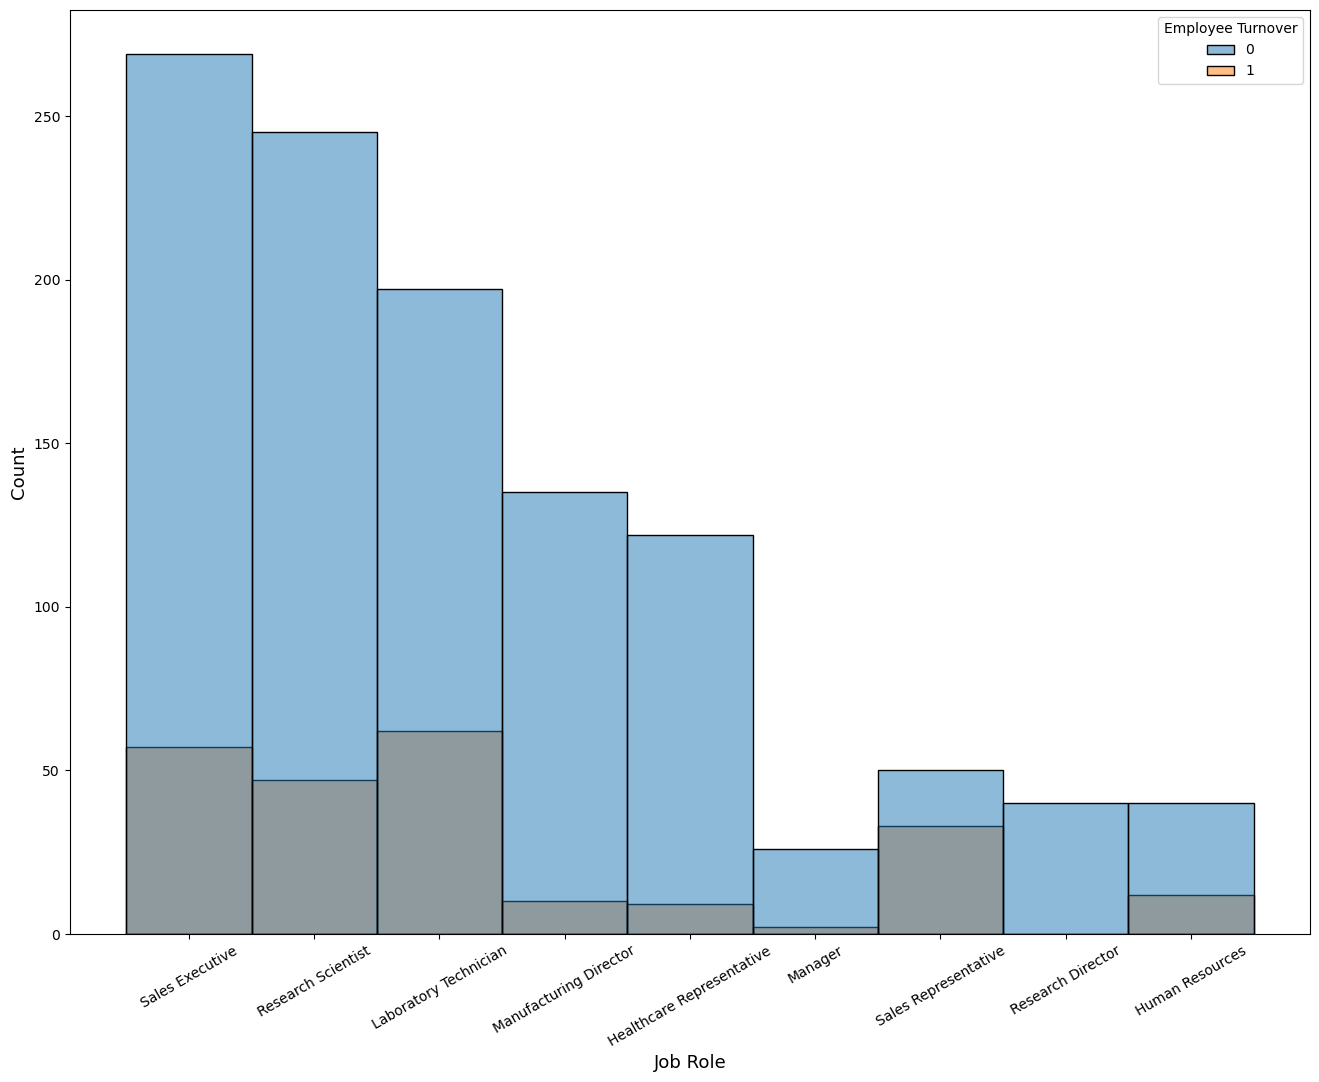

In [21]:
##Employee turnover vs Job role
plt.figure(figsize=(16,12))
sns.histplot(clean_data,x='Job Role',hue='Employee Turnover')
plt.xticks(rotation=30)
plt.xlabel('Job Role', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

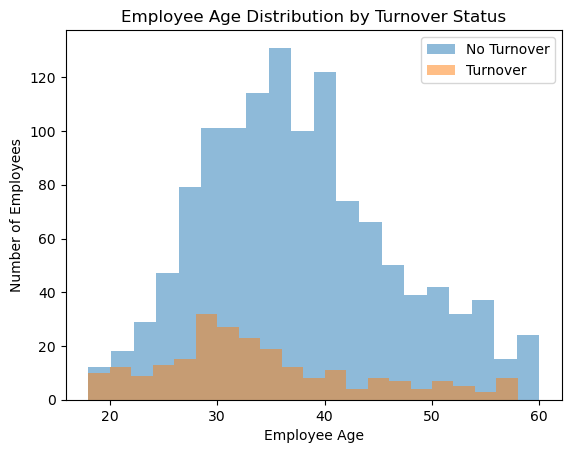

In [22]:
#Employee turnover vs age
plt.hist(df[df["Employee Turnover"] == 0]["Employee Age"], bins=20, alpha=0.5, label="No Turnover")
plt.hist(df[df["Employee Turnover"] == 1]["Employee Age"], bins=20, alpha=0.5, label="Turnover")
plt.xlabel("Employee Age")
plt.ylabel("Number of Employees")
plt.title("Employee Age Distribution by Turnover Status")
plt.legend()
plt.show()


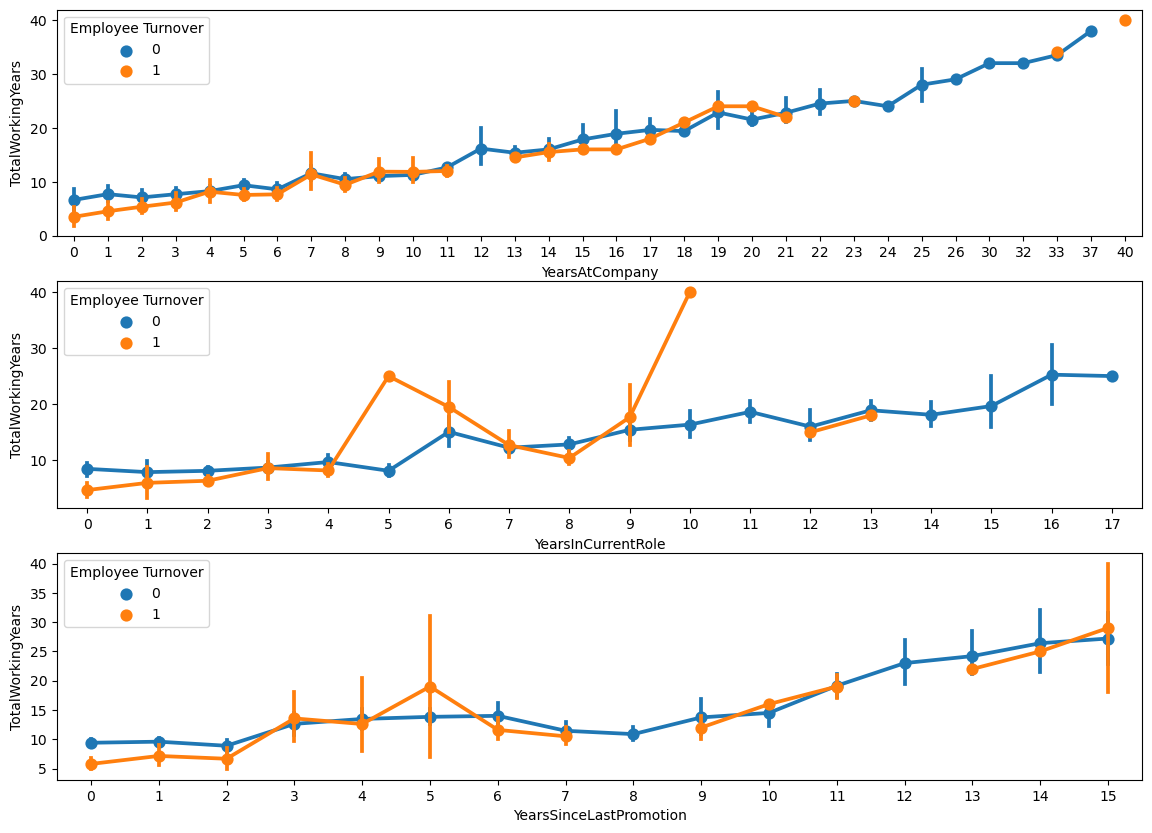

In [23]:
##Employee turnover vs Employee history
columns=['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']

fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(14,10))
for i,col in enumerate(columns):
    sns.pointplot(x=clean_data[col], y=clean_data['TotalWorkingYears'],ax=axes[i], hue=clean_data['Employee Turnover'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('TotalWorkingYears')

plt.show()

C:\Users\sakshi panchal\AppData\Local\Temp\ipykernel_17936\1271772964.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Employee Age'], shade=True, color="r", label="All Employees")
C:\Users\sakshi panchal\AppData\Local\Temp\ipykernel_17936\1271772964.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Employee Turnover'] == 1]['Employee Age'], shade=True, color="b", label="Turnover")


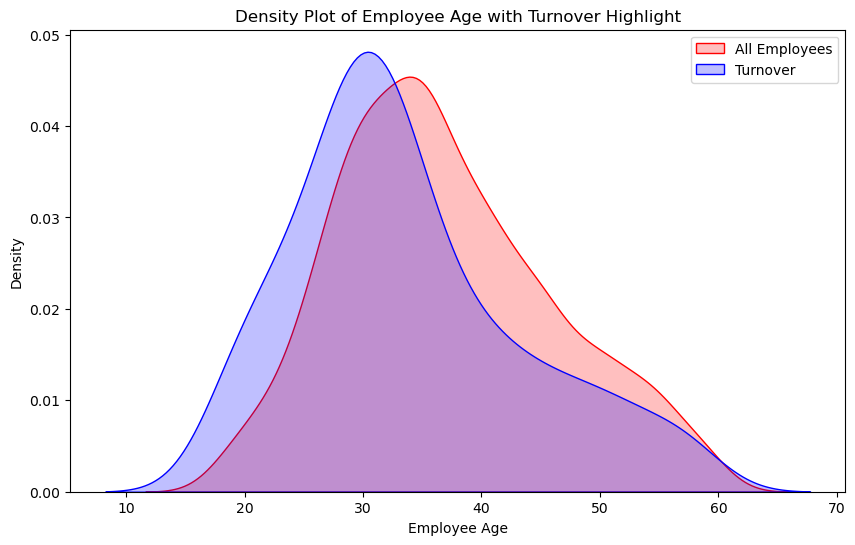

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Employee Age'], shade=True, color="r", label="All Employees")
sns.kdeplot(df[df['Employee Turnover'] == 1]['Employee Age'], shade=True, color="b", label="Turnover")
plt.title('Density Plot of Employee Age with Turnover Highlight')
plt.xlabel('Employee Age')
plt.ylabel('Density')
plt.legend()
plt.show()


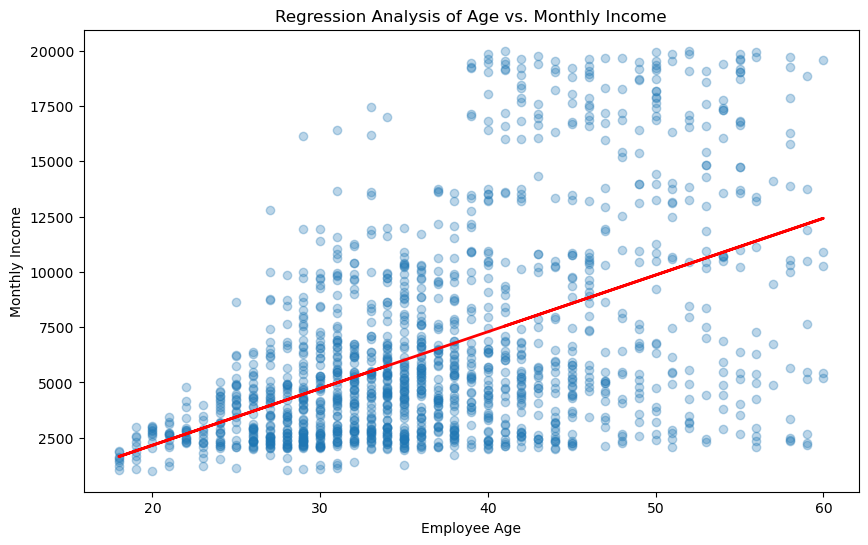

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     483.8
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.67e-93
Time:                        17:33:27   Log-Likelihood:                -14308.
No. Observations:                1470   AIC:                         2.862e+04
Df Residuals:                    1468   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2970.6712    443.702     -6.695   

In [27]:
import statsmodels.api as sm

# OLS regression
X = sm.add_constant(df['Employee Age'])  # adding a constant
Y = df['MonthlyIncome']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Plot regression
plt.figure(figsize=(10, 6))
plt.scatter(df['Employee Age'], df['MonthlyIncome'], alpha=0.3)
plt.plot(df['Employee Age'], predictions, color='red', linewidth=2)
plt.xlabel('Employee Age')
plt.ylabel('Monthly Income')
plt.title('Regression Analysis of Age vs. Monthly Income')
plt.show()

print(model.summary())


C:\Users\sakshi panchal\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


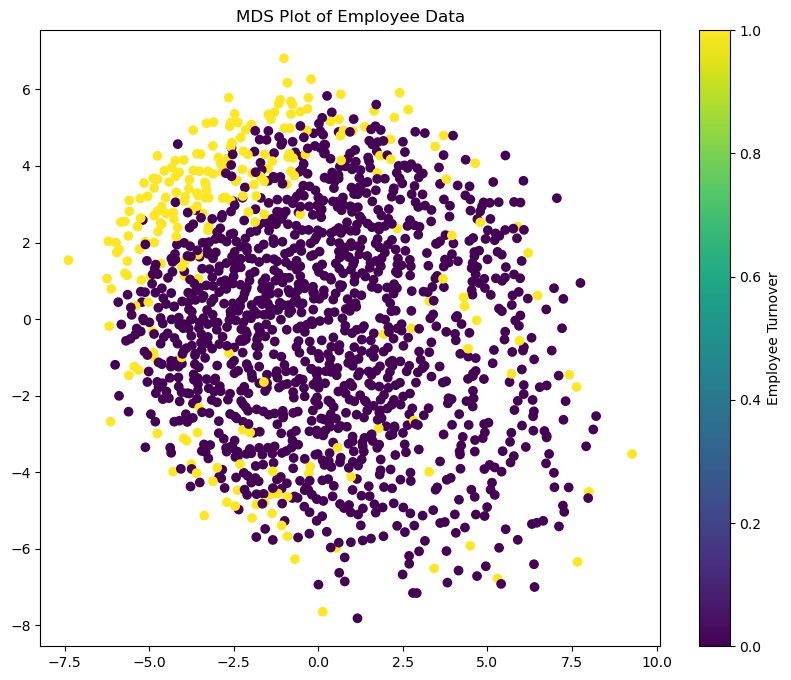

In [28]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# MDS model
mds = MDS(n_components=2, random_state=0)
data_2d = mds.fit_transform(data_scaled)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(data_2d[:,0], data_2d[:,1], c=df['Employee Turnover'])
plt.colorbar(label='Employee Turnover')
plt.title('MDS Plot of Employee Data')
plt.show()
